In [3]:
import cudf
from cuml.linear_model import LogisticRegression
from cuml.model_selection import train_test_split
import pickle
from cuml.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import os

In [4]:
df = cudf.read_csv("fashion-mnist_test.csv")

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(10000, 785)

In [7]:
X = df[df.columns[1:]]
Y = df['label']

In [8]:
X = X / 255. # normalize values to the range [0,1]

In [9]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [37]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size=1000)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=1000)

In [39]:
X_train.shape, Y_train.shape

((8000, 784), (8000,))

In [40]:
X_validate.shape, Y_validate.shape

((1000, 784), (1000,))

In [41]:
X_test.shape, Y_test.shape

((1000, 784), (1000,))

In [42]:
def get_metrics(x, ytrue, estimator):
    ypred = estimator.predict(x)
    acc = accuracy_score(ytrue, ypred)
    print("Accuracy:", acc)
    cm = confusion_matrix(ytrue, ypred).get()
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_display.plot()

## No regularization

In [43]:
not_regularized_estimator = LogisticRegression(solver="qn", penalty='none', max_iter=10000).fit(X_train, Y_train)

### Training set

Accuracy: 1.0


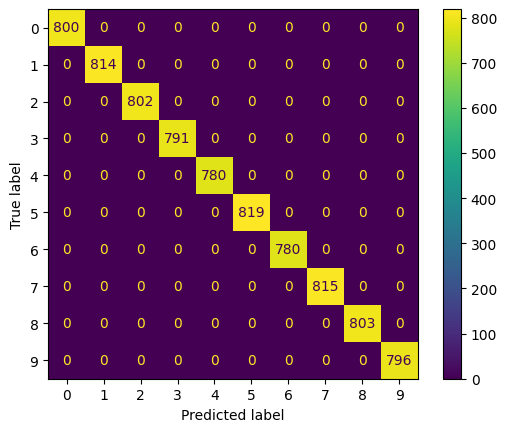

In [44]:
get_metrics(X_train, Y_train, not_regularized_estimator)

### Validation set

Accuracy: 0.7509999871253967


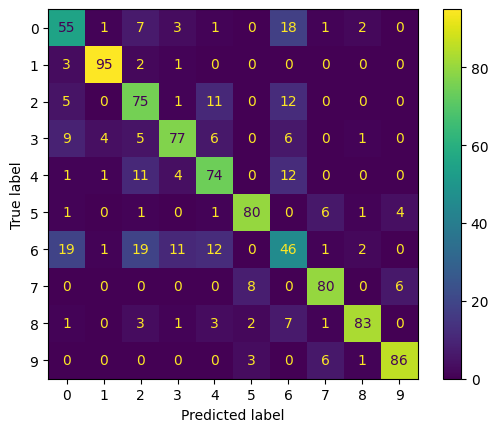

In [45]:
get_metrics(X_validate, Y_validate, not_regularized_estimator)

### Testing set

Accuracy: 0.7260000109672546


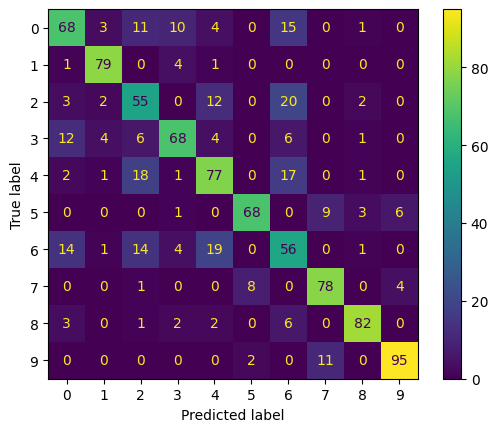

In [46]:
get_metrics(X_test, Y_test, not_regularized_estimator)

## L2 regularization

In [47]:
l2_regularized_estimator = LogisticRegression(solver="qn", penalty='l2',  max_iter=10000).fit(X_train, Y_train)

### Training set

Accuracy: 0.9390000104904175


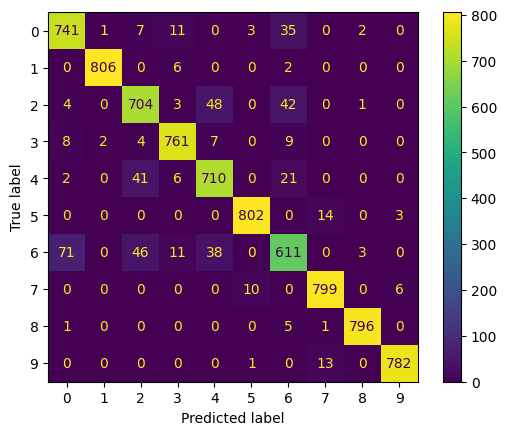

In [48]:
get_metrics(X_train, Y_train, l2_regularized_estimator)

### Validation set

Accuracy: 0.8230000138282776


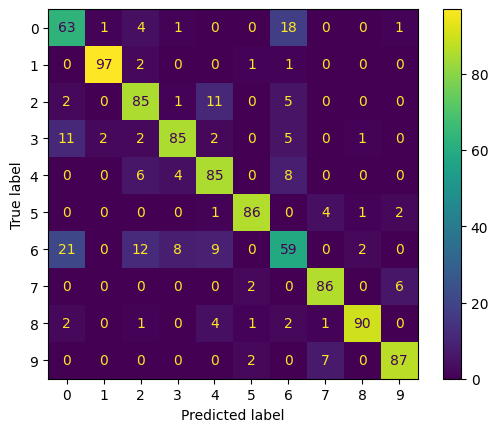

In [49]:
get_metrics(X_validate, Y_validate, l2_regularized_estimator)

### Testing set

Accuracy: 0.8199999928474426


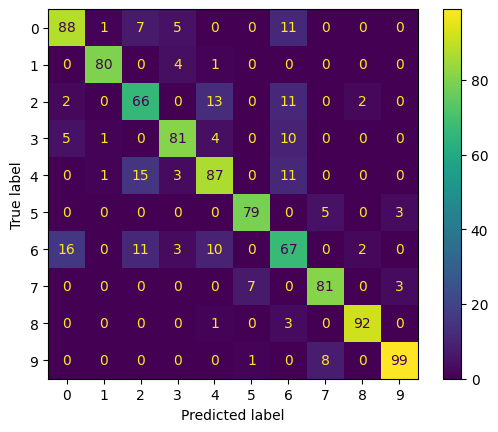

In [50]:
get_metrics(X_test, Y_test, l2_regularized_estimator)

## 5-fold cross-validation

Fold 0:
  Train: index=[2000 2001 2002 ... 9997 9998 9999]
  Test:  index=[   0    1    2 ... 1997 1998 1999]
Training
Accuracy: 0.9358749985694885
Validation
Accuracy: 0.8119999766349792
Testing
Accuracy: 0.8330000042915344
Fold 1:
  Train: index=[   0    1    2 ... 9997 9998 9999]
  Test:  index=[2000 2001 2002 ... 3997 3998 3999]
Training
Accuracy: 0.9337499737739563
Validation
Accuracy: 0.8320000171661377
Testing
Accuracy: 0.8230000138282776
Fold 2:
  Train: index=[   0    1    2 ... 9997 9998 9999]
  Test:  index=[4000 4001 4002 ... 5997 5998 5999]
Training
Accuracy: 0.9341250061988831
Validation
Accuracy: 0.843999981880188
Testing
Accuracy: 0.8140000104904175
Fold 3:
  Train: index=[   0    1    2 ... 9997 9998 9999]
  Test:  index=[6000 6001 6002 ... 7997 7998 7999]
Training
Accuracy: 0.9351249933242798
Validation
Accuracy: 0.8320000171661377
Testing
Accuracy: 0.8050000071525574
Fold 4:
  Train: index=[   0    1    2 ... 7997 7998 7999]
  Test:  index=[8000 8001 8002 ... 9997 99

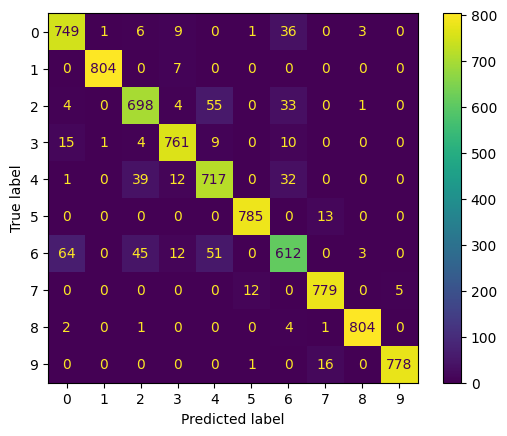

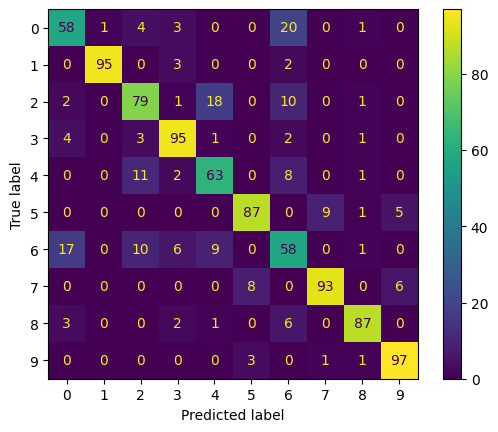

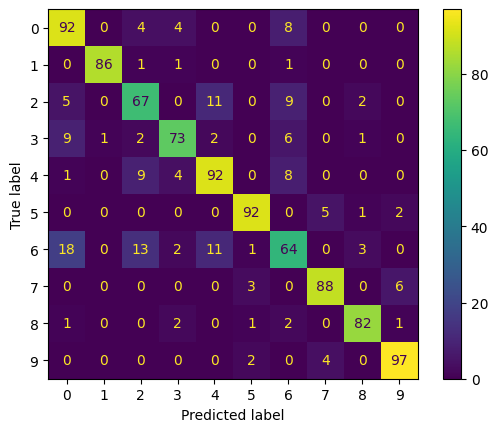

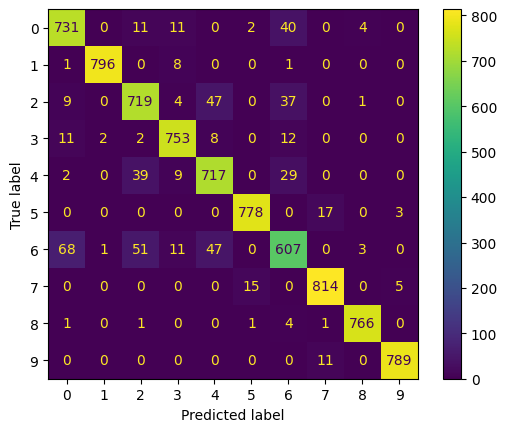

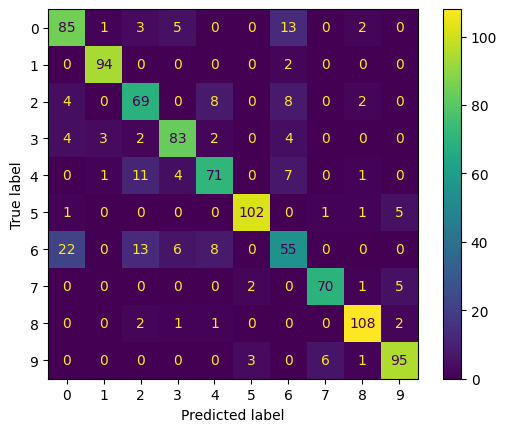

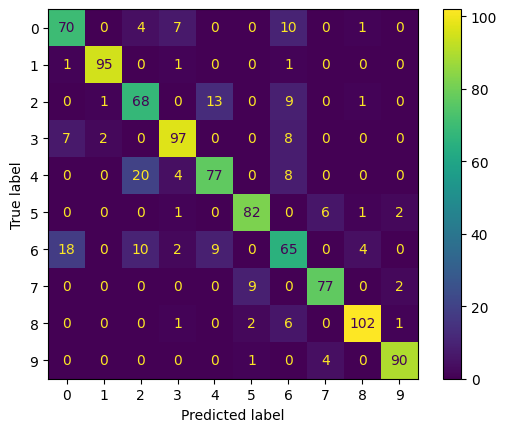

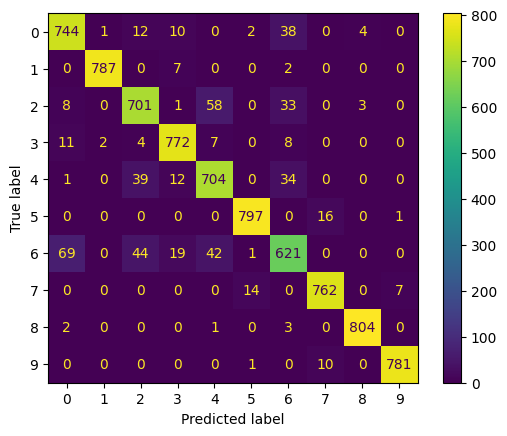

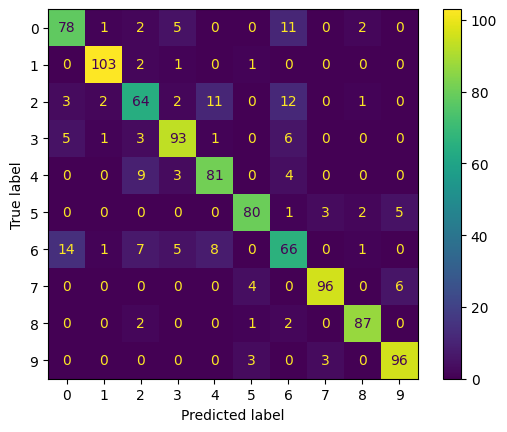

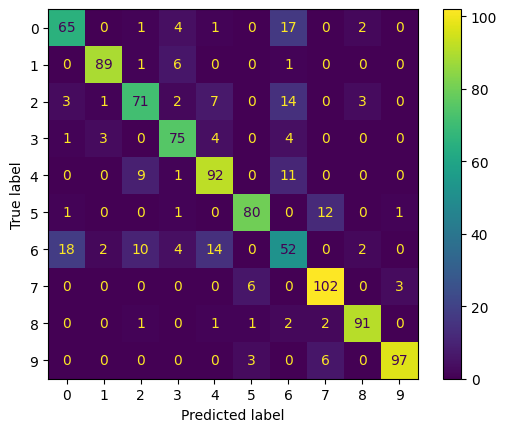

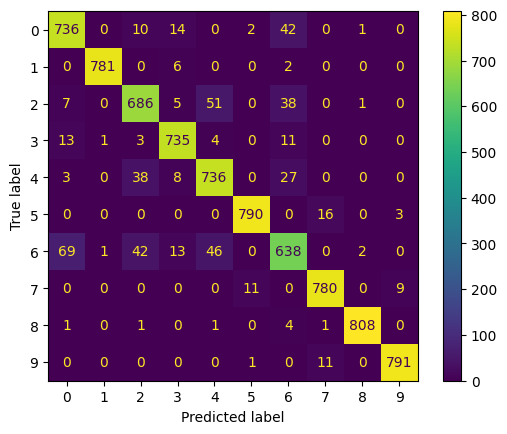

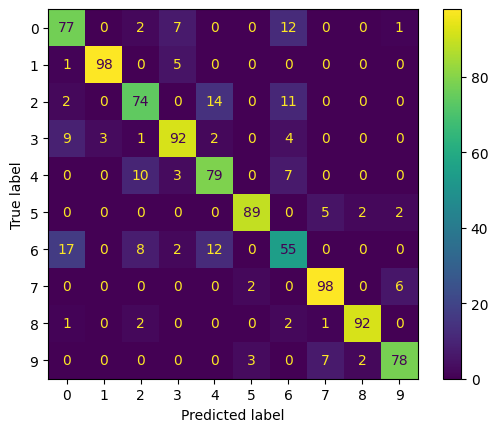

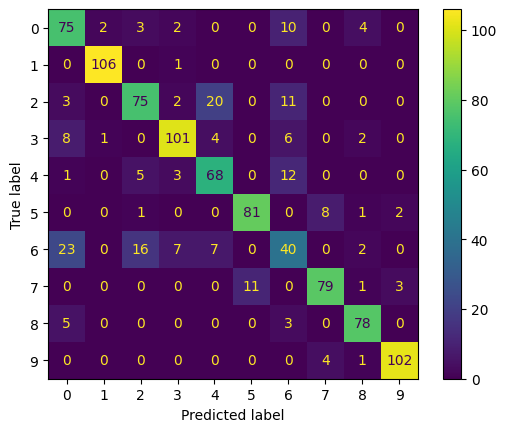

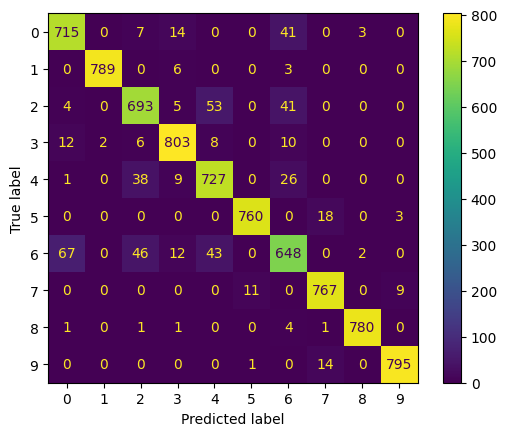

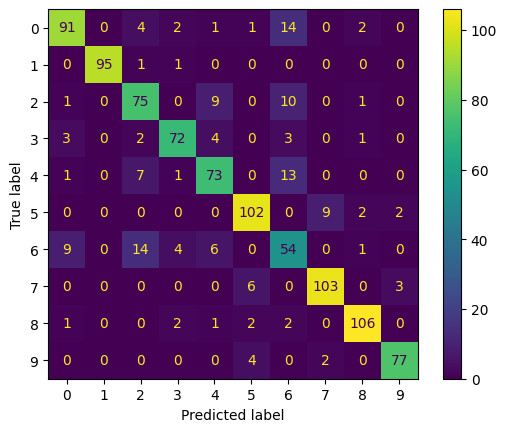

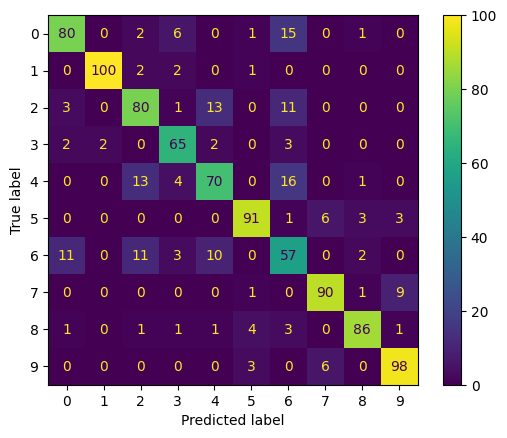

In [36]:
kf = KFold()
estimators = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print("="*30)
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    X_train, Y_train = X.loc[train_index], Y.loc[train_index]
    X_test, X_validate, Y_test, Y_validate = train_test_split(X.loc[test_index], Y.loc[test_index], test_size=1000)
    estimator = LogisticRegression(solver="qn", penalty='l2',  max_iter=10000).fit(X_train, Y_train)
    print("Training")
    get_metrics(X_train, Y_train, estimator)
    print("Validation")
    get_metrics(X_validate, Y_validate, estimator)
    print("Testing")
    get_metrics(X_test, Y_test, estimator)